# Support Vector Machines

In [1]:
import numpy as np                    
import matplotlib.pyplot as plt        
import sklearn                         
import sklearn.datasets as ds           
import sklearn.model_selection as cv   
import sklearn.neighbors as nb          
from sklearn.model_selection import cross_val_score  
%matplotlib inline        

In [2]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
dfTrain = pd.read_csv(r'..\Datasets\training-dataset-reduced.csv')
dfTest = pd.read_csv(r'..\Datasets\testing-dataset-reduced.csv')

dfTrain = dfTrain.iloc[: , 1:]
dfTest = dfTest.iloc[: , 1:]
X_train, y_train = dfTrain.drop('y', axis=1), dfTrain["y"]
X_test, y_test = dfTest.drop('y', axis=1), dfTest["y"]


## Linear SVM

Let's try an SVM with default parameters. Linear means that we are not using any kernel to move the data to a higher dimensional space.

In [3]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("Accuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))



Confusion matrix on test set:
 [[2502  479]
 [  39  313]]
Accuracy on test set:  0.8445844584458446
Precision on test set:  0.3952020202020202
Recall on test set:  0.8892045454545454
F1 on test set:  0.5472027972027972


These results could be considered bad results, as weak classifiers do better than this. A way to improve the model is by configuring the parametes. 
The linear SVM has parameter C that has to be adjusted. We will use *GridSearch* method to find the optimal value of C.

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


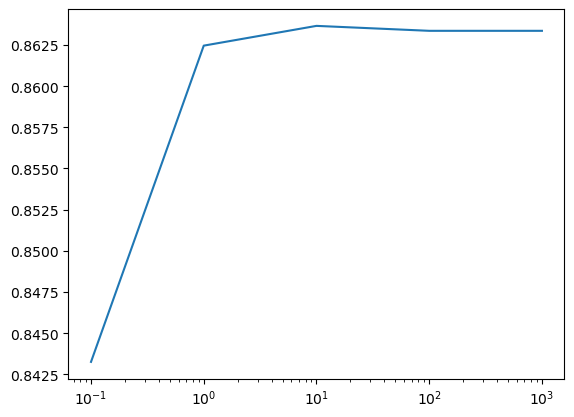

In [4]:
# List of C values to test.
Cs = np.logspace(-1, 3, num=5, base=10.0)
print(Cs)
param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Let's plot the 5-fold cross.validation f measure deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()


In [5]:

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=5, scoring='accuracy')
print('Accuracy 5-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("Accuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


Accuracy 5-fold cross on train data=  0.8636588682402984

Confusion matrix on test set:
 [[2506  475]
 [  40  312]]
Accuracy on test set:  0.8454845484548454
Precision on test set:  0.39644218551461247
Recall on test set:  0.8863636363636364
F1 on test set:  0.5478489903424056

Best value of parameter C found:  {'C': 10.0}

Number of supports:  2357 ( 2315 of them have slacks)
Prop. of supports:  0.3535323233838308


This are still very bad results and the improvment is practically null. Because lineal kernel give that bad results, we can conclude that our problem is not linear. Let's try with polynomial kernel.

## Polynomial kernels


In [6]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))


Confusion matrix on test set:
 [[2482  499]
 [  36  316]]

Accuracy on test set:  0.8394839483948395
Precision on test set:  0.38773006134969323
Recall on test set:  0.8977272727272727
F1 on test set:  0.5415595544130248


Worse performance than the obtained with a linear SVM... It could improve if we tune the C parameter for the polynomial kernel. Let's do that now.

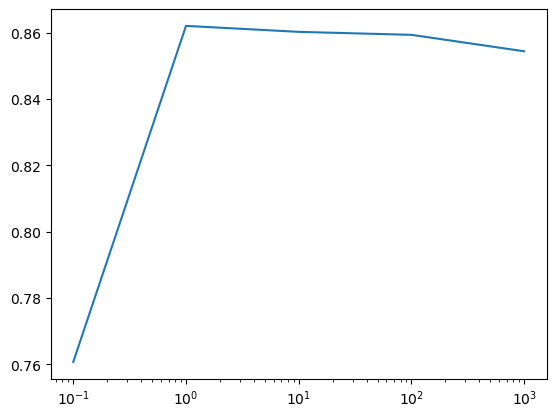

Acc. 10-fold cross on train data=  0.862008905524732

Confusion matrix on test set:
 [[2482  499]
 [  36  316]]

Accuracy on test set:  0.8394839483948395
Precision on test set:  0.38773006134969323
Recall on test set:  0.8977272727272727
F1 on test set:  0.5415595544130248

Best combination of parameters found:  {'C': 1.0}

Number of supports:  2873 ( 2679 of them have slacks)
Prop. of supports:  0.4309284535773211


In [7]:
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=5)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=5, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Once again, results are worse than the linear kernel and, in fact, as the best C value found is 1, the results are not improved.

In [8]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))


Confusion matrix on test set:
 [[2473  508]
 [  37  315]]

Accuracy on test set:  0.8364836483648365
Precision on test set:  0.3827460510328068
Recall on test set:  0.8948863636363636
F1 on test set:  0.5361702127659574


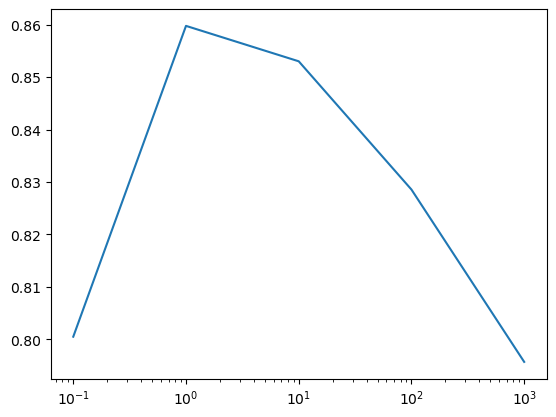

Acc. 10-fold cross on train data=  0.8597575555807992

Confusion matrix on test set:
 [[2473  508]
 [  37  315]]

Accuracy on test set:  0.8364836483648365
Precision on test set:  0.3827460510328068
Recall on test set:  0.8948863636363636
F1 on test set:  0.5361702127659574

Best combination of parameters found:  {'C': 1.0}

Number of supports:  2859 ( 2448 of them have slacks)
Prop. of supports:  0.4288285585720714


In [12]:
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=5)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=5, scoring='accuracy')
print('Acc. 5-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF Kernel

There's another possibility for the kernel: The RBF kernel. This is the default kernel in the implementation of SVMs in sklearn, so we don't need to explicitely say the kernel used. Let's try it with default parameters.

In [13]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))


Confusion matrix on test set:
 [[2489  492]
 [  40  312]]

Accuracy on test set:  0.8403840384038403
Precision on test set:  0.3880597014925373
Recall on test set:  0.8863636363636364
F1 on test set:  0.5397923875432525


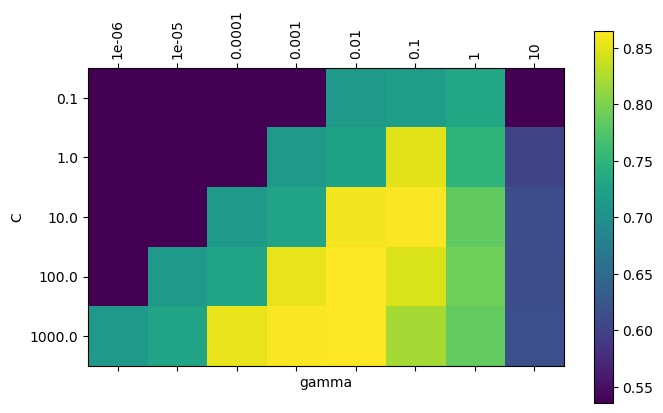


Best combination of parameters found:  {'C': 1000.0, 'gamma': 0.01}

Acc. 2-fold cross on train data=  0.8650077558363124


In [18]:

# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=3, scoring='accuracy')
print('\nAcc. 2-fold cross on train data= ', cvacc.mean())


In [19]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("Precision on test set: ",sklearn.metrics.precision_score(y_test, pred))
print("Recall on test set: ",sklearn.metrics.recall_score(y_test, pred))
print("F1 on test set: ",sklearn.metrics.f1_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[2527  454]
 [  36  316]]

Accuracy on test set:  0.8529852985298529
Precision on test set:  0.4103896103896104
Recall on test set:  0.8977272727272727
F1 on test set:  0.5632798573975044

Number of supports:  2192 ( 1854 of them have slacks)
Prop. of supports:  0.3287835608219589
